<a href="https://colab.research.google.com/github/xiujingtab/NG-Circos/blob/master/TestRunML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


dataset 0
---------
xx:  [[-1.7095969 -1.6895969 -1.6695969 ...  2.5704031  2.5904031  2.6104031]
 [-1.7095969 -1.6895969 -1.6695969 ...  2.5704031  2.5904031  2.6104031]
 [-1.7095969 -1.6895969 -1.6695969 ...  2.5704031  2.5904031  2.6104031]
 ...
 [-1.7095969 -1.6895969 -1.6695969 ...  2.5704031  2.5904031  2.6104031]
 [-1.7095969 -1.6895969 -1.6695969 ...  2.5704031  2.5904031  2.6104031]
 [-1.7095969 -1.6895969 -1.6695969 ...  2.5704031  2.5904031  2.6104031]]
yy [[-1.33662419 -1.33662419 -1.33662419 ... -1.33662419 -1.33662419
  -1.33662419]
 [-1.31662419 -1.31662419 -1.31662419 ... -1.31662419 -1.31662419
  -1.31662419]
 [-1.29662419 -1.29662419 -1.29662419 ... -1.29662419 -1.29662419
  -1.29662419]
 ...
 [ 1.80337581  1.80337581  1.80337581 ...  1.80337581  1.80337581
   1.80337581]
 [ 1.82337581  1.82337581  1.82337581 ...  1.82337581  1.82337581
   1.82337581]
 [ 1.84337581  1.84337581  1.84337581 ...  1.84337581  1.84337581
   1.84337581]]
LogisticRegression: 0.86
LinearSVC:

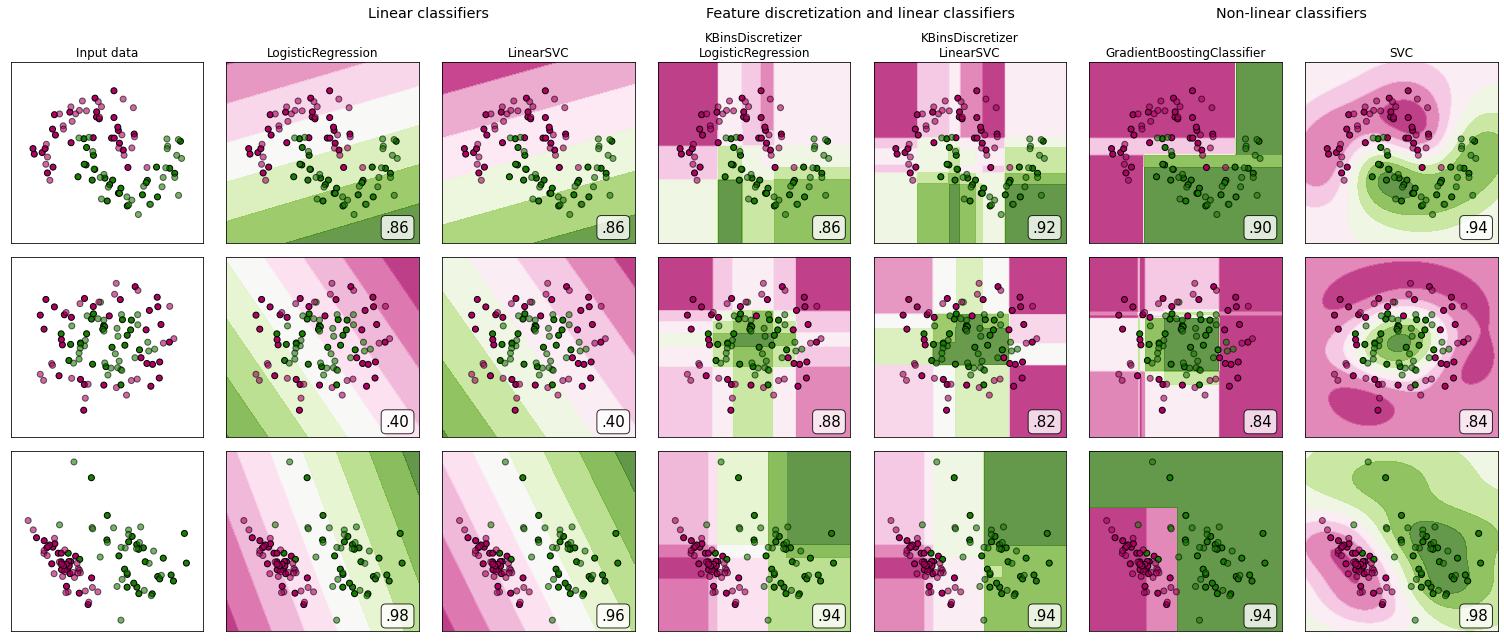

In [ ]:
# Code source: Tom Dupré la Tour
# Adapted from plot_classifier_comparison by Gaël Varoquaux and Andreas Müller
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

h = 0.02  # step size in the mesh


def get_name(estimator):
    name = estimator.__class__.__name__
    if name == "Pipeline":
        name = [get_name(est[1]) for est in estimator.steps]
        name = " + ".join(name)
    return name


# list of (estimator, param_grid), where param_grid is used in GridSearchCV
# The parameter spaces in this example are limited to a narrow band to reduce
# its runtime. In a real use case, a broader search space for the algorithms
# should be used.
classifiers = [
    (
        make_pipeline(StandardScaler(), LogisticRegression(random_state=0)),
        {"logisticregression__C": np.logspace(-1, 1, 3)},
    ),
    (
        make_pipeline(StandardScaler(), LinearSVC(random_state=0)),
        {"linearsvc__C": np.logspace(-1, 1, 3)},
    ),
    (
        make_pipeline(
            StandardScaler(),
            KBinsDiscretizer(encode="onehot"),
            LogisticRegression(random_state=0),
        ),
        {
            "kbinsdiscretizer__n_bins": np.arange(5, 8),
            "logisticregression__C": np.logspace(-1, 1, 3),
        },
    ),
    (
        make_pipeline(
            StandardScaler(),
            KBinsDiscretizer(encode="onehot"),
            LinearSVC(random_state=0),
        ),
        {
            "kbinsdiscretizer__n_bins": np.arange(5, 8),
            "linearsvc__C": np.logspace(-1, 1, 3),
        },
    ),
    (
        make_pipeline(
            StandardScaler(), GradientBoostingClassifier(n_estimators=5, random_state=0)
        ),
        {"gradientboostingclassifier__learning_rate": np.logspace(-2, 0, 5)},
    ),
    (
        make_pipeline(StandardScaler(), SVC(random_state=0)),
        {"svc__C": np.logspace(-1, 1, 3)},
    ),
]

names = [get_name(e).replace("StandardScaler + ", "") for e, _ in classifiers]

n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_classification(
        n_samples=n_samples,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=2,
        n_clusters_per_class=1,
    ),
]

fig, axes = plt.subplots(
    nrows=len(datasets), ncols=len(classifiers) + 1, figsize=(21, 9)
)

cm_piyg = plt.cm.PiYG
cm_bright = ListedColormap(["#b30065", "#178000"])

# iterate over datasets
for ds_cnt, (X, y) in enumerate(datasets):
    print(f"\ndataset {ds_cnt}\n---------")

    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=42
    )

    # create the grid for background colors
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print("xx: ",xx)
    print("yy", yy)
    
    
    
    # plot the dataset first
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # and testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    # iterate over classifiers
    for est_idx, (name, (estimator, param_grid)) in enumerate(zip(names, classifiers)):
        ax = axes[ds_cnt, est_idx + 1]

        clf = GridSearchCV(estimator=estimator, param_grid=param_grid)
        with ignore_warnings(category=ConvergenceWarning):
            clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f"{name}: {score:.2f}")

        # plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]*[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm_piyg, alpha=0.8)

        # plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(name.replace(" + ", "\n"))
        ax.text(
            0.95,
            0.06,
            (f"{score:.2f}").lstrip("0"),
            size=15,
            bbox=dict(boxstyle="round", alpha=0.8, facecolor="white"),
            transform=ax.transAxes,
            horizontalalignment="right",
        )


plt.tight_layout()

# Add suptitles above the figure
plt.subplots_adjust(top=0.90)
suptitles = [
    "Linear classifiers",
    "Feature discretization and linear classifiers",
    "Non-linear classifiers",
]
for i, suptitle in zip([1, 3, 5], suptitles):
    ax = axes[0, i]
    ax.text(
        1.05,
        1.25,
        suptitle,
        transform=ax.transAxes,
        horizontalalignment="center",
        size="x-large",
    )
plt.show()